<a href="https://colab.research.google.com/github/2025-01-sookmyung-opensource/final_project/blob/pre-yoon/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. 프로젝트 요약

In [9]:
## test2 : "시각장애인을 위한 물체 인식 안내 시스템 만들기"
# 상세 : 오픈소스 컴퓨터 비전 모델(YOLOv5)을 활용하여, 시각장애인이 길거리에서 흔히 마주치는 장애물/물체를 실시간으로 인식하고 음성으로 안내해 주는 시스템을 만드는 프로젝트

# 순서
# 1. 카메라에서 실시간 영상 입력
# 2. YOLOv5 모델로 물체 인식
# 3. 인식된 물체를 음성으로 변환하여 사용자에게 안내

1. 데이터 생성 : Roboflow

In [10]:
#1. https://universe.roboflow.com 에서 데이터를 검색한다. (현재 : crosswalk)

#2. 원하는 데이터셋을 fork 한다.

#3. https://app.roboflow.com 로 이동해서 fork 한 프로젝트로 진입한다.

#4. 우측 상단에 “Download Dataset” 버튼을 누르고, Format : YOLOv5 PyTorch 를 설정한뒤 Show download code 를 선택해서 데이터를 다운받는다.

2. YOLOv5 설치 및 환경 설정

In [ ]:
# YOLOv5 설치
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

3. 데이터셋 불러오기

In [ ]:
# Roboflow에서 제공한 코드
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="") # 보안상의 문제로 비워서 깃에 커밋함.
project = rf.workspace("yoon-pvmwt").project("traffic-signals-wxmow-2xnpw")
version = project.version(1)
dataset = version.download("yolov5")

4. YOLOv5 모델 학습

In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

5. 학습시킨 것과 유사한 이미지로 모델 성능 비교

Saving 신호등.png to 신호등.png
detect: weights=['runs/train/exp/weights/best.pt'], source=uploaded_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=result_best, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7072156 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/yolov5/yolov5/uploaded_images/신호등.png: 384x640 (no detections), 30.0ms
Speed: 0.5ms pre-process, 30.0ms inference, 22.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/result_best
detect: weights=['yolov5s.pt'], source=uploaded_images, data=da

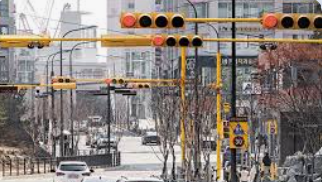

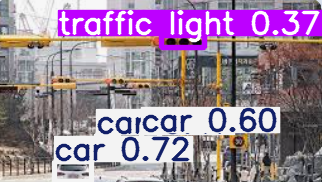

In [17]:
from google.colab import files
uploaded = files.upload()

import os

# 신호등 이미지 업로드 (학습데이터와 유사함)
uploaded_files = list(uploaded.keys())
input_images = "uploaded_images"
os.makedirs(input_images, exist_ok=True)

# 업로드한 파일을 YOLO에 사용할 디렉토리로 이동
for filename in uploaded_files:
    os.rename(filename, os.path.join(input_images, filename))


# 학습된 모델과 기존 모델 각각 실행
!python detect.py \
  --weights runs/train/exp/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source uploaded_images \
  --project runs/detect \
  --name result_best \
  --exist-ok

!python detect.py \
  --weights yolov5s.pt \
  --img 640 \
  --conf 0.25 \
  --source uploaded_images \
  --project runs/detect \
  --name result_yolov5s \
  --exist-ok


# 결과 표시
from IPython.display import Image, display

result_best_path = "runs/detect/result_best"
result_yolo_path = "runs/detect/result_yolov5s"

result_best_files = os.listdir(result_best_path)
result_yolo_files = os.listdir(result_yolo_path)

for file in result_best_files:
    if file.endswith(".jpg") or file.endswith(".png"):
        display(Image(filename=os.path.join(result_best_path, file)))
        display(Image(filename=os.path.join(result_yolo_path, file)))

비교 결과 ==> **커스텀 모델 (best.pt)**은 신호등(traffic light)을 어느 정도 감지할 수 있으나, 정확도(0.37)가 낮음.

YOLOv5s는 신호등을 전혀 감지하지 못하고, **차량(car)**은 더 잘 감지함.

이는 커스텀 모델이 신호등에 특화된 학습이 진행되었다는 것을 의미함.

즉, 어느 정도 학습에 성공했으나 아직은 부족한 점이 많음!!

6. 새로운 데이터로 학습 후 다시 비교

In [ ]:
# https://universe.roboflow.com 에서 새로운 데이터 가져오기 (현재 : traffic signal)
  # 기존에는 모든 교통 표지판 데이터를 학습시켰다.
  # 이번에는 신호등에 중점을 두어 다시 학습시키고자 한다.


# Roboflow에서 제공한 코드
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="") # api 키는 커밋하지 않음
project = rf.workspace("yoon-pvmwt").project("data-analytics-3-backup-ptn2e")
version = project.version(1)
dataset = version.download("yolov5")

# 기존 best.pt 모델을 기반으로 추가 학습
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data '{dataset.location}/data.yaml' \
  --weights runs/train/exp/weights/best.pt \
  --cache \
  --name finetune_best

Saving 신호등.png to 신호등.png
detect: weights=['yolov5s.pt'], source=uploaded_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=result_yolov5s, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/yolov5/uploaded_images/신호등.png: 384x640 3 cars, 1 traffic light, 30.5ms
Speed: 0.5ms pre-process, 30.5ms inference, 126.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/result_yolov5s
detect: weights=['runs/train/exp/weights/best.pt'], source=uploade

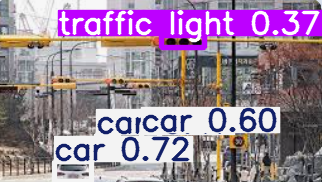

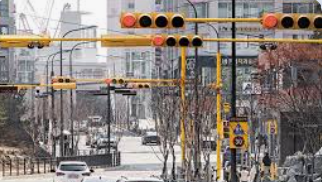

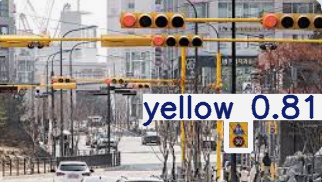

In [24]:
from google.colab import files
uploaded = files.upload()

import os

# 신호등 이미지 업로드 (학습데이터와 유사함)
uploaded_files = list(uploaded.keys())
input_images = "uploaded_images"
os.makedirs(input_images, exist_ok=True)

# 업로드한 파일을 YOLO에 사용할 디렉토리로 이동
for filename in uploaded_files:
    os.rename(filename, os.path.join(input_images, filename))


# 기본 모델 yolov5s.pt로 감지
!python detect.py \
  --weights yolov5s.pt \
  --img 640 \
  --conf 0.25 \
  --source uploaded_images \
  --project runs/detect \
  --name result_yolov5s \
  --exist-ok

# 기존 학습된 모델 best.pt로 감지
!python detect.py \
  --weights runs/train/exp/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source uploaded_images \
  --project runs/detect \
  --name result_best \
  --exist-ok

# best.pt로 추가 학습한 모델 finetune_best로 감지
!python detect.py \
  --weights runs/train/finetune_best/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source uploaded_images \
  --project runs/detect \
  --name result_finetune_best \
  --exist-ok

from IPython.display import Image, display
import os

# 경로 설정
result_yolo_path = "runs/detect/result_yolov5s"
result_best_path = "runs/detect/result_best"
result_finetune_best_path = "runs/detect/result_finetune_best"

# 각 경로에서 파일 목록 가져오기
result_yolo_files = os.listdir(result_yolo_path)
result_best_files = os.listdir(result_best_path)
result_finetune_best_files = os.listdir(result_finetune_best_path)

# 파일 비교 (같은 이름의 파일을 기준으로 비교)
for file in result_yolo_files:
    if file.endswith(".jpg") or file.endswith(".png"):
        # 각 모델의 결과 이미지 표시
        display(Image(filename=os.path.join(result_yolo_path, file)))
        display(Image(filename=os.path.join(result_best_path, file)))
        display(Image(filename=os.path.join(result_finetune_best_path, file)))

Saving 신호등2.png to 신호등2.png
detect: weights=['yolov5s.pt'], source=uploaded_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=result_yolov5s, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/yolov5/uploaded_images/신호등.png: 384x640 3 cars, 1 traffic light, 49.7ms
image 2/2 /content/yolov5/yolov5/uploaded_images/신호등2.png: 448x640 4 cars, 1 truck, 106.5ms
Speed: 0.6ms pre-process, 78.1ms inference, 248.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to

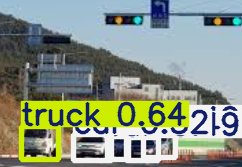

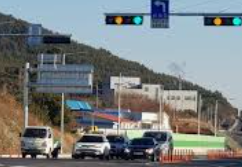

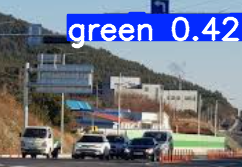

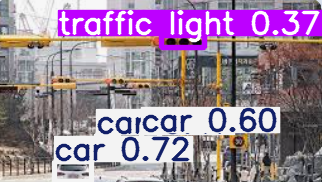

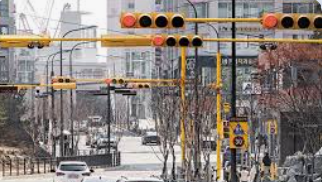

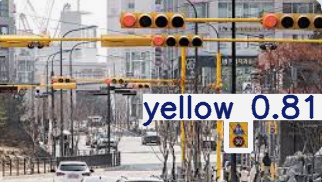

In [25]:
from google.colab import files
uploaded = files.upload()

import os

# 신호등 이미지 업로드 (학습데이터와 유사함)
uploaded_files = list(uploaded.keys())
input_images = "uploaded_images"
os.makedirs(input_images, exist_ok=True)

# 업로드한 파일을 YOLO에 사용할 디렉토리로 이동
for filename in uploaded_files:
    os.rename(filename, os.path.join(input_images, filename))


# 기본 모델 yolov5s.pt로 감지
!python detect.py \
  --weights yolov5s.pt \
  --img 640 \
  --conf 0.25 \
  --source uploaded_images \
  --project runs/detect \
  --name result_yolov5s \
  --exist-ok

# 기존 학습된 모델 best.pt로 감지
!python detect.py \
  --weights runs/train/exp/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source uploaded_images \
  --project runs/detect \
  --name result_best \
  --exist-ok

# best.pt로 추가 학습한 모델 finetune_best로 감지
!python detect.py \
  --weights runs/train/finetune_best/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source uploaded_images \
  --project runs/detect \
  --name result_finetune_best \
  --exist-ok

from IPython.display import Image, display
import os

# 경로 설정
result_yolo_path = "runs/detect/result_yolov5s"
result_best_path = "runs/detect/result_best"
result_finetune_best_path = "runs/detect/result_finetune_best"

# 각 경로에서 파일 목록 가져오기
result_yolo_files = os.listdir(result_yolo_path)
result_best_files = os.listdir(result_best_path)
result_finetune_best_files = os.listdir(result_finetune_best_path)

# 파일 비교 (같은 이름의 파일을 기준으로 비교)
for file in result_yolo_files:
    if file.endswith(".jpg") or file.endswith(".png"):
        # 각 모델의 결과 이미지 표시
        display(Image(filename=os.path.join(result_yolo_path, file)))
        display(Image(filename=os.path.join(result_best_path, file)))
        display(Image(filename=os.path.join(result_finetune_best_path, file)))

## 📊 YOLO 모델 탐지 결과 비교 분석

### ✅ 실험 대상 이미지
- 신호등이 포함된 도심 교차로 사진 1장
- 차량과 녹색 신호등이 포함된 도로 사진 1장

---

### 🧠 사용한 모델

| 모델 이름 | 설명 |
|-----------|------|
| `best.pt` | 커스텀 학습 모델 (신호등 및 차량 탐지 목적) |
| `yolov5s.pt` | YOLOv5 사전 학습 모델 |
| 색상 기반 모델 | 신호등 색상 감지 특화 모델 (`green`, `yellow` 등 라벨 존재) |

---

### 📌 이미지 1: 도심 신호등 풍경

| 모델 | 탐지 객체 | 라벨 | 신뢰도 | 비고 |
|------|------------|--------|--------|------|
| `best.pt` | 신호등 | `traffic light` | 0.37 | 낮은 신뢰도 |
| `yolov5s.pt` | 차량 | `car`, `carcar` | 0.60, 0.72 | `carcar` 라벨 중복 오류 있음 |
| 색상 기반 | 표지판 | `yellow` | 0.81 | 신호등 아님 (교통 표지판으로 보임) |

---

### 📌 이미지 2: 교차로 차량 + 신호등 (녹색 불)

| 모델 | 탐지 객체 | 라벨 | 신뢰도 | 비고 |
|------|------------|--------|--------|------|
| `best.pt` | 차량 | `truck`, `car` | 0.64, 0.59 | 차량 구분 정확 |
| `yolov5s.pt` | 없음 | - | - | 감지 실패 |
| 색상 기반 | 신호등 상태 | `green` | 0.42 | 녹색 불빛 감지 성공 |

---

### 📝 종합 분석

- `best.pt`는 차량 탐지 성능이 양호하며, 신호등 탐지는 다소 미흡
- YOLOv5s는 차량에 한정된 탐지 성능만 보임. 교통 인식에는 부족
- 색상 기반 모델은 신호등 불빛(녹색, 노란색) 감지에 강하지만, 클래스 명칭(`green`, `yellow`)이 모호하여 해석 어려움

---